<a href="https://www.kaggle.com/code/pinkai/audio-analysis-using-librosa?scriptVersionId=124891066" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob
    #list files in the dataset
    
import librosa

import librosa.display



In [2]:
#to play the audio files in the notebook
import IPython.display as ipd

In [3]:
#for colors and pretty graphs
from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

Frequency: Number of waves in a second

High Frequency will contain more number of waves (trough and down) in one second.

*High Frequency will have **short wavelength** .*


Intensity: How high is the wave. Height. Amplitude.

**db/power**

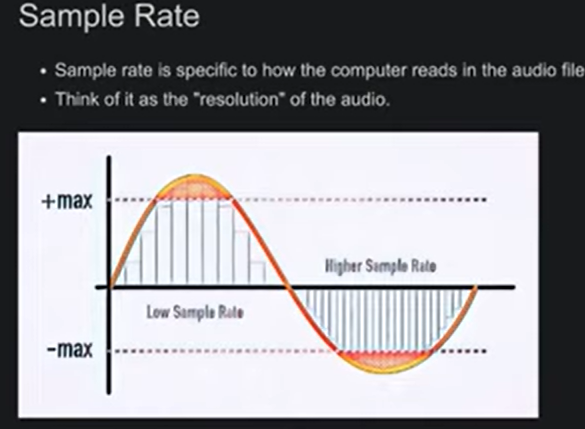




*Computer read audio file wrt the quality and the resolution to differentiate*

In [4]:
audio_files = glob('../input/ravdess-emotional-speech-audio/*/*.wav')
#list of all the files

In [5]:
ipd.Audio(audio_files[19])

In [6]:
ipd.Audio(audio_files[56])

In [7]:
ipd.Audio(audio_files[89])

In [8]:
ipd.Audio(audio_files[1])

In [9]:
#Reading the audio

y, sr = librosa.load(audio_files[19])

#y is the raw data
#sr-> sample rate

print(f"y: {y[:11]}\ny.shape: {y.shape}\nsample rate (sr): {sr}")

y: [-6.7011162e-14 -6.0050970e-14 -4.9082933e-15 -3.5239403e-14
 -2.7046531e-14  2.4695798e-14  8.8307318e-14  2.3707095e-14
  4.9899226e-14 -9.4578621e-14  7.1711002e-14]
y.shape: (80931,)
sample rate (sr): 22050


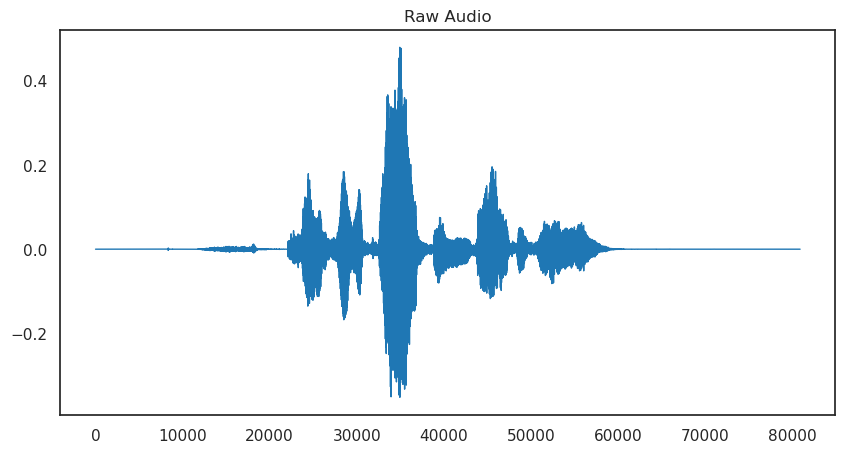

In [10]:
#converting nupy array to pandas series for easy plotting
pd.Series(y).plot(figsize=(10,5), lw=1, title="Raw Audio")
    #lw = line width
    
plt.show()

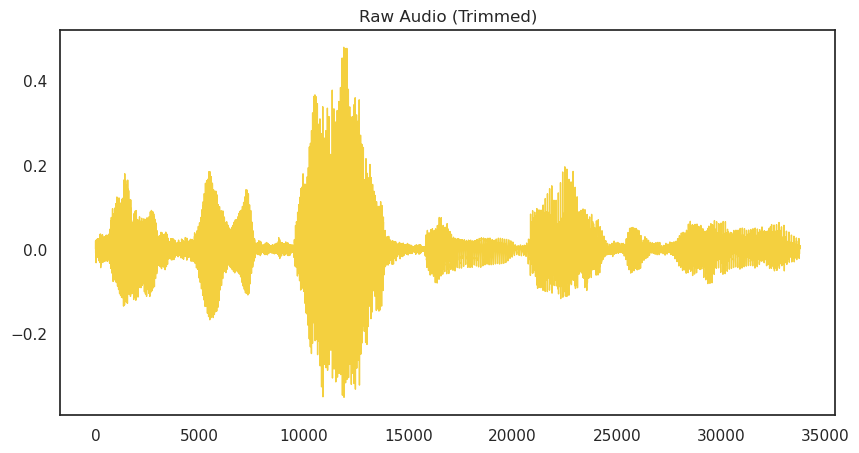

In [11]:
#removing the silence b4 and after the audio

y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10,5), lw=1, title="Raw Audio (Trimmed)", color = "#F4D03F")
    #lw = line width
    
plt.show()

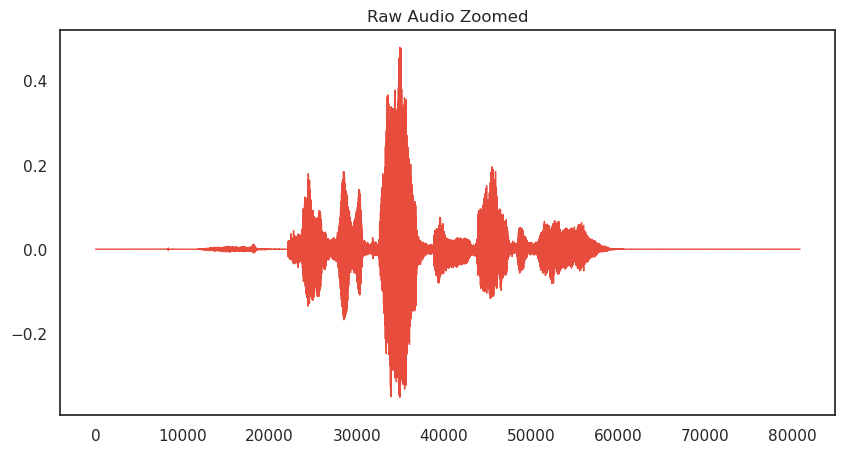

In [12]:
#ZOOMING on the audio file
#say seeing btwn 10000 to 20000

pd.Series(y).plot(figsize=(10,5), lw=1, title="Raw Audio Zoomed", color="#E74C3C")
plt.show()

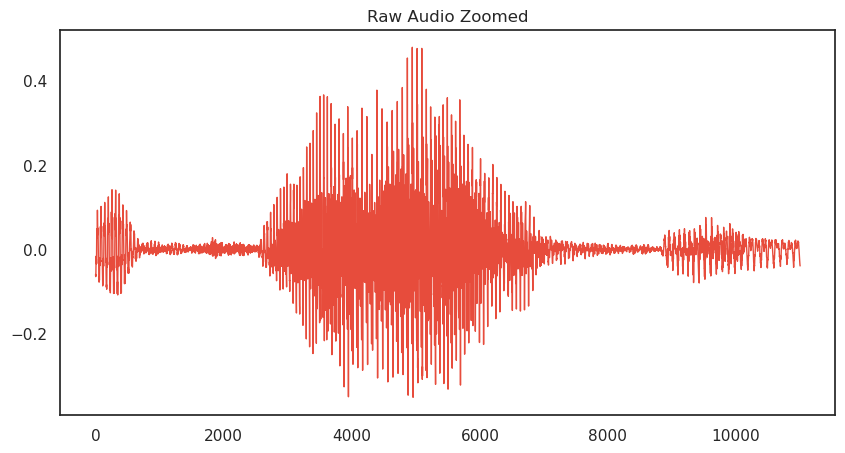

In [13]:
pd.Series(y[30000:41000]).plot(figsize=(10,5), lw=1, title="Raw Audio Zoomed", color="#E74C3C")
plt.show()

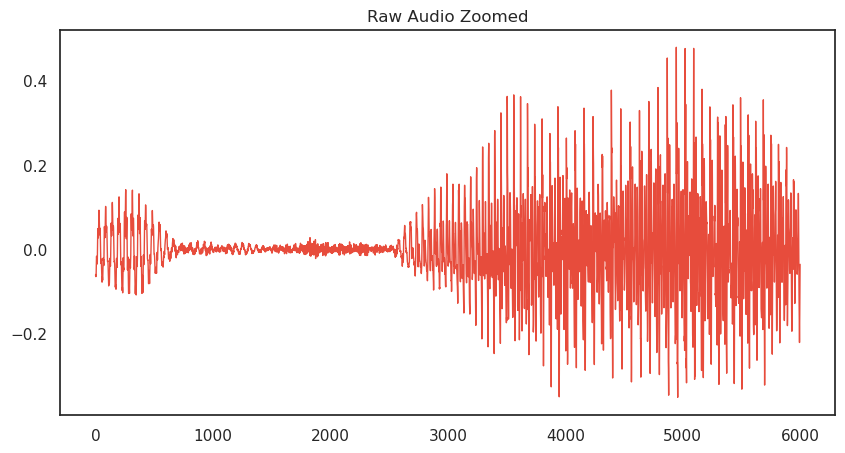

In [14]:
pd.Series(y[30000:36000]).plot(figsize=(10,5), lw=1, title="Raw Audio Zoomed", color="#E74C3C")
plt.show()

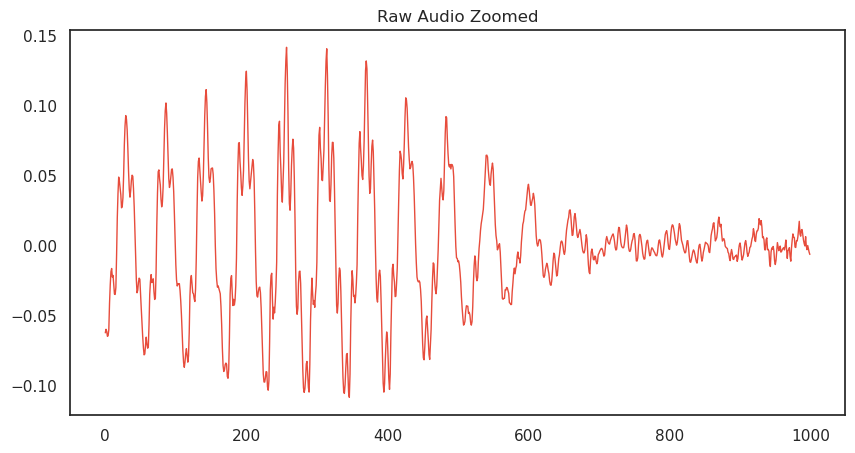

In [15]:
pd.Series(y[30000:31000]).plot(figsize=(10,5), lw=1, title="Raw Audio Zoomed", color="#E74C3C")
plt.show()

## How powerfull is the audio ?

Applying Fourier Transformation

Which frequencies are sounding at different part of the audio


# SPECTOGRAM

In [16]:
D = librosa.stft(y)
    # SHort time Fourier Transform
    
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 159)

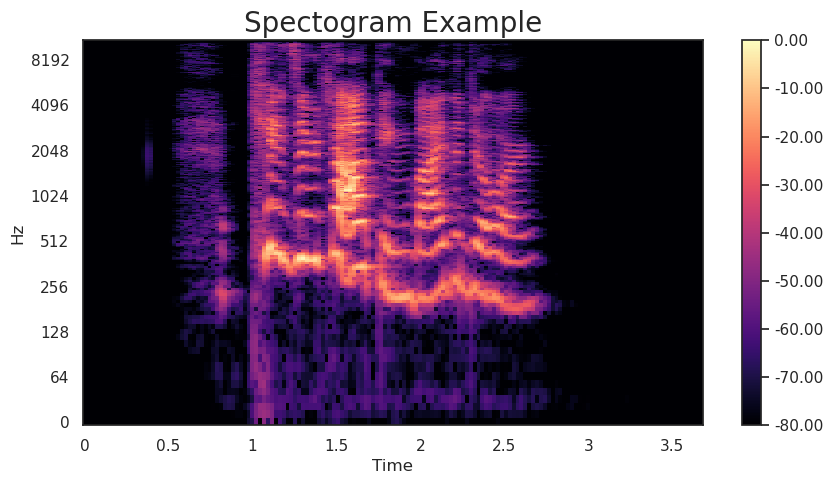

In [17]:
#Plotting the transformed Data
# This data is transformed into a ML Model for insight extraction

fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log',ax=ax)

ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')

*Spectogram can be used on a ML Model*

MEL SPECTOGRAM


mel for melody

In [18]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

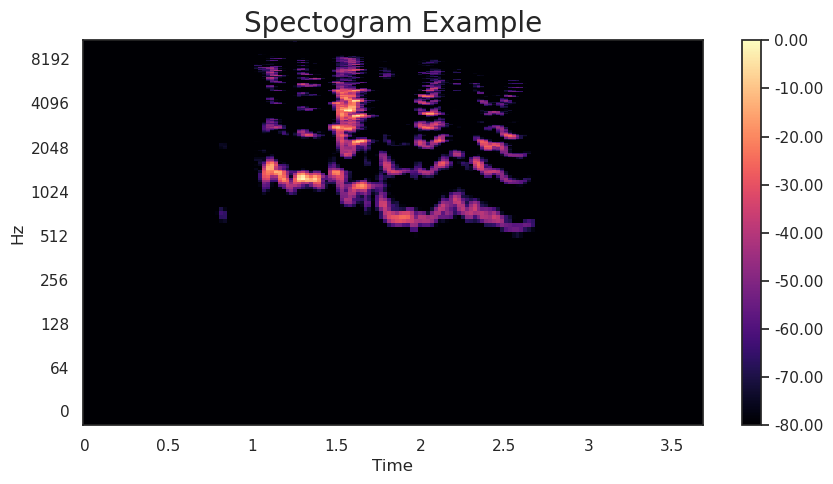

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log',ax=ax)

ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')

In [20]:
S_db_mel

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)